___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 5<br><br>CNN Syntax Basics<br><br>MNIST Data<br><h1>

# Dataset Info

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![3Dto2D](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

In [77]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [1]:
!python --version

Python 3.10.16


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.18.0


In [4]:
!pip install tensorflow==2.12.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.1 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.19.0rc0)
ERROR: No matching distribution found for tensorflow==2.12.1


In [5]:
print(tf.__version__)

2.18.0


In [6]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

In [8]:
import tensorflow as tf
from tensorflow import keras

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [9]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

In [10]:
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

# Recognizing and Understanding Data

In [11]:
from tensorflow.keras.datasets.mnist import load_data  # To load the MNIST digit dataset

(X_train, y_train), (X_test, y_test) = load_data()  # Loading data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [13]:
# Checking the shape of one image
X_train[99].shape

(28, 28)

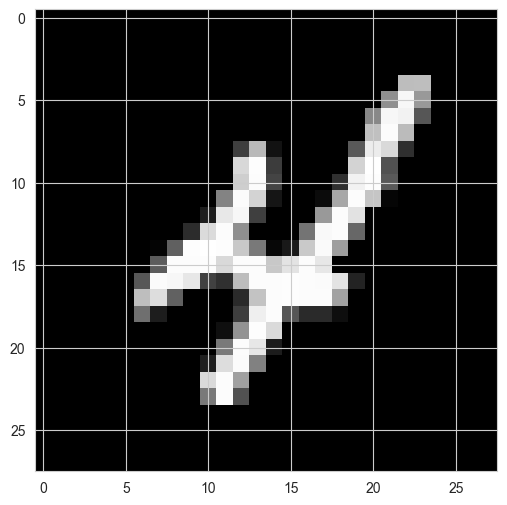

In [14]:
plt.imshow(X_train[9], cmap="gray")

<Axes: >

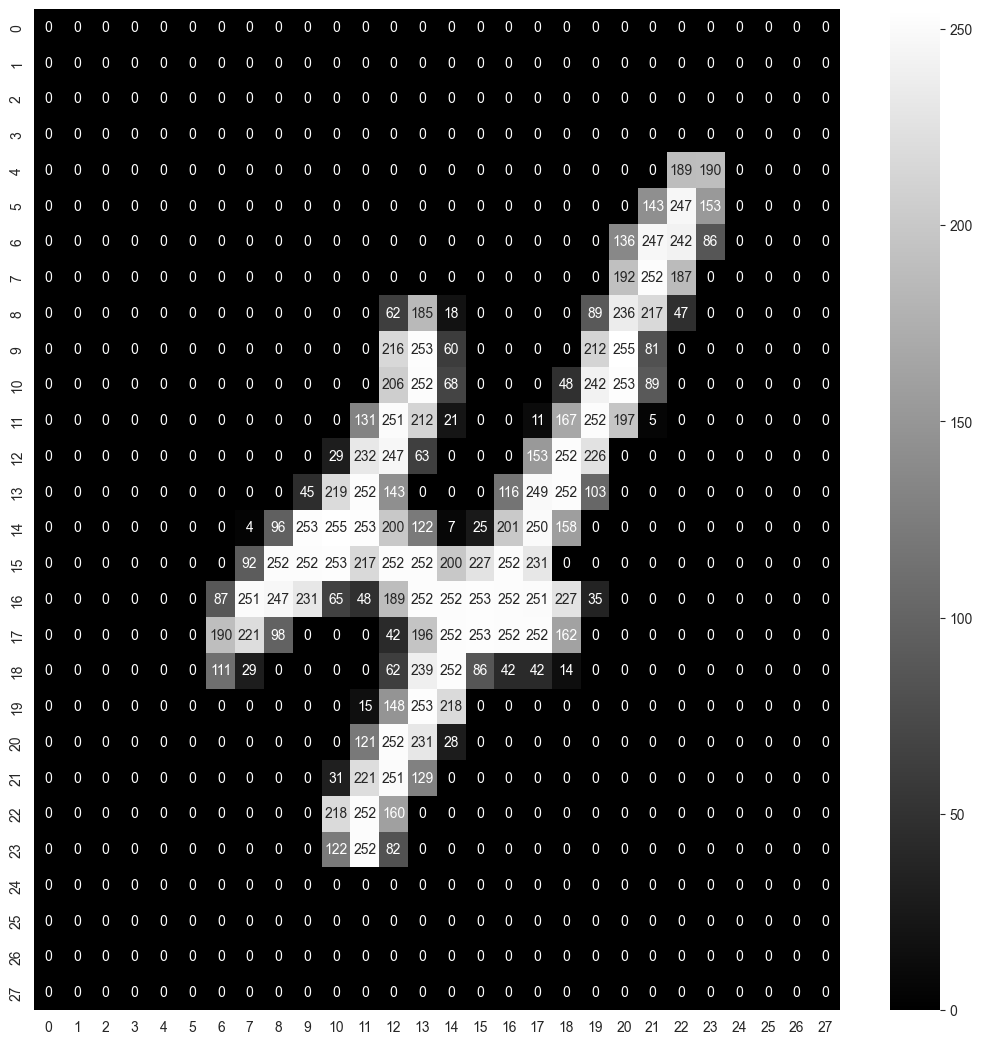

In [15]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[9], annot=True, cmap="gray", fmt=".3g")

In [16]:
len(X_train[24999])

28

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [18]:
y_train[9]

np.uint8(4)

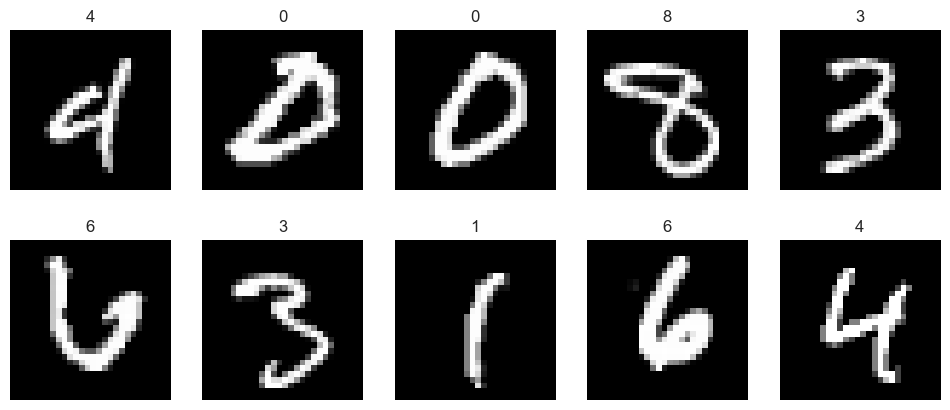

In [19]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(X_train[idx], cmap="gray")
plt.show()

# Data Preprocessing

In [20]:
X_train[342].min()

np.uint8(0)

In [21]:
X_train[9].max()

np.uint8(255)

In [22]:
# Normalize image pixels
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [23]:
X_train[9].min()

np.float32(0.0)

In [24]:
X_train[9].max()

np.float32(1.0)

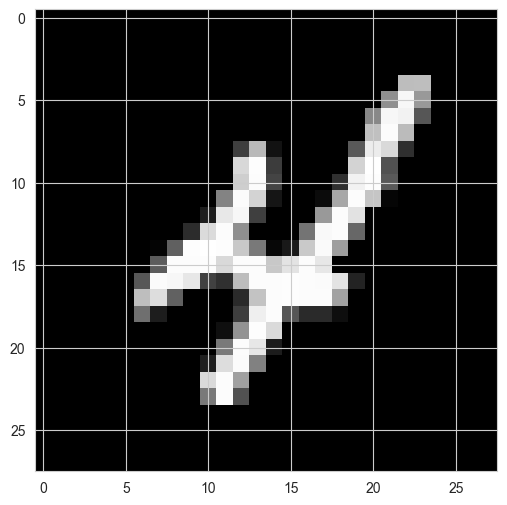

In [25]:
plt.imshow(X_train[9], cmap="gray")
plt.show()

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
np.expand_dims(X_train, 3).shape

(60000, 28, 28, 1)

In [28]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [31]:
y_train.shape

(60000,)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [34]:
y_train[9]

np.uint8(4)

In [35]:
Y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

# Modeling

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

model.add(
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

# maybe add dropout layer here

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Number of parameter in CL

$((n \times m \times l)+1) \times k$

$n \times m$*: filter shape*

$l$*: number of input channel (feature maps as input)*

$k$*: number of output channel (feature maps as output)*

In [39]:
((3 * 3 * 1) + 1) * 32

320

In [40]:
# !pip install --upgrade tensorflow

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [43]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9130 - loss: 0.3015

2025-02-26 09:21:22.678779: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-02-26 09:21:22.679322: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9131 - loss: 0.3012 - val_accuracy: 0.9767 - val_loss: 0.0716
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0563 - val_accuracy: 0.9821 - val_loss: 0.0536
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9904 - loss: 0.0336 - val_accuracy: 0.9843 - val_loss: 0.0468
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9941 - loss: 0.0205 - val_accuracy: 0.9867 - val_loss: 0.0458
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9968 - loss: 0.0125 - val_accuracy: 0.9861 - val_loss: 0.0540
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.9869 - val_loss: 0.0469
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9979 - loss: 0.0074 - val_accuracy: 0.9850 - val_loss: 0.0542
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9983 - loss: 0.0056 - val_ac

In [44]:
X_train.shape

(60000, 28, 28, 1)

In [45]:
Y_train.shape

(60000, 10)

In [46]:
model.metrics_names

['loss', 'compile_metrics']

In [47]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.956,0.150,0.977,0.072
1,0.984,0.052,0.982,0.054
2,0.991,0.032,0.984,0.047
3,0.994,0.020,0.987,0.046
4,0.996,0.013,0.986,0.054


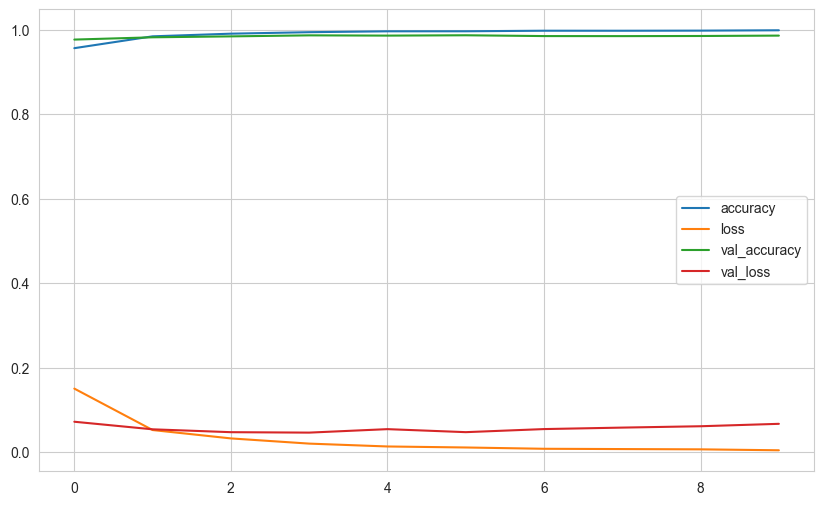

In [48]:
summary.plot();

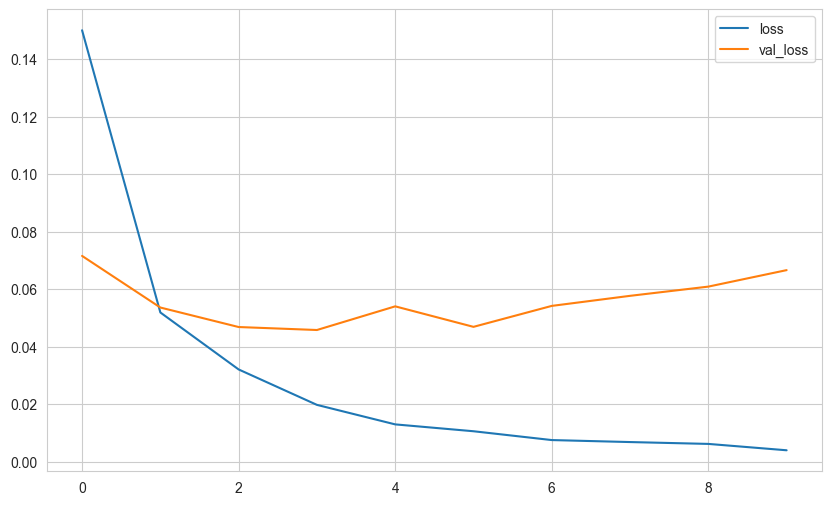

In [49]:
summary[["loss", "val_loss"]].plot();

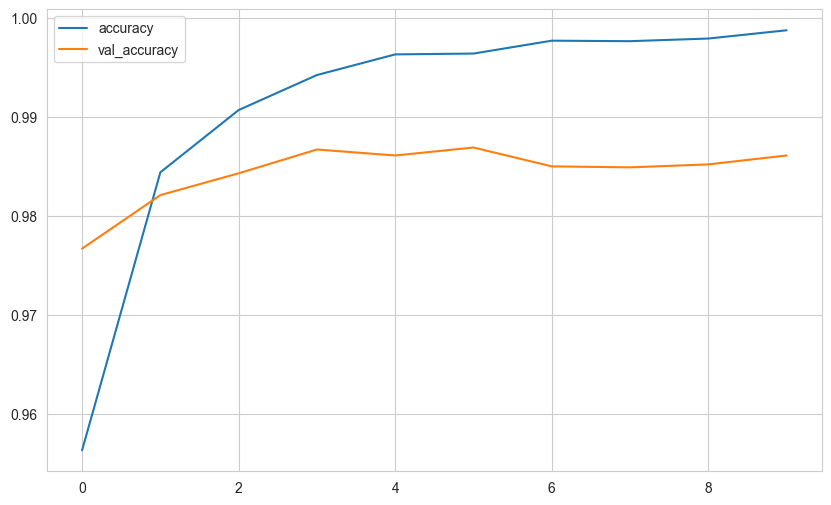

In [50]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [51]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [52]:
model.evaluate(X_test, Y_test)

143/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9811 - loss: 0.0580

2025-02-26 09:22:49.932906: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-02-26 09:22:49.933161: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9829 - loss: 0.0563


[0.04689287766814232, 0.9868999719619751]

In [53]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04689287766814232
Test accuracy: 0.9868999719619751


In [54]:
pred_prob = model.predict(X_test)
pred_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.        , 0.        , 0.00000016, ..., 0.9999999 , 0.        ,
        0.        ],
       [0.        , 0.00000002, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999595, 0.00000011, ..., 0.00000205, 0.00000152,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(10000, 10), dtype=float32)

In [55]:
pred_prob.shape

(10000, 10)

In [56]:
pred_prob[0]

array([0.        , 0.        , 0.00000016, 0.00000004, 0.        ,
       0.        , 0.        , 0.9999999 , 0.        , 0.        ],
      dtype=float32)

In [57]:
np.argmax(pred_prob[0])

np.int64(7)

In [58]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [59]:
y_pred.shape

(10000,)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [61]:
print(confusion_matrix(y_test, y_pred))

[[ 970    1    2    1    1    1    3    0    1    0]
 [   0 1131    0    1    0    0    1    0    2    0]
 [   1    2 1014    3    0    0    1    7    4    0]
 [   0    0    1 1000    0    6    0    1    2    0]
 [   0    0    1    0  968    0    0    0    1   12]
 [   0    0    0    4    0  885    1    0    1    1]
 [   1    3    0    1    4    3  944    0    2    0]
 [   0    1    8    2    0    0    0 1010    1    6]
 [   1    0    3    1    1    2    2    1  959    4]
 [   0    1    0    6    4    3    0    3    4  988]]


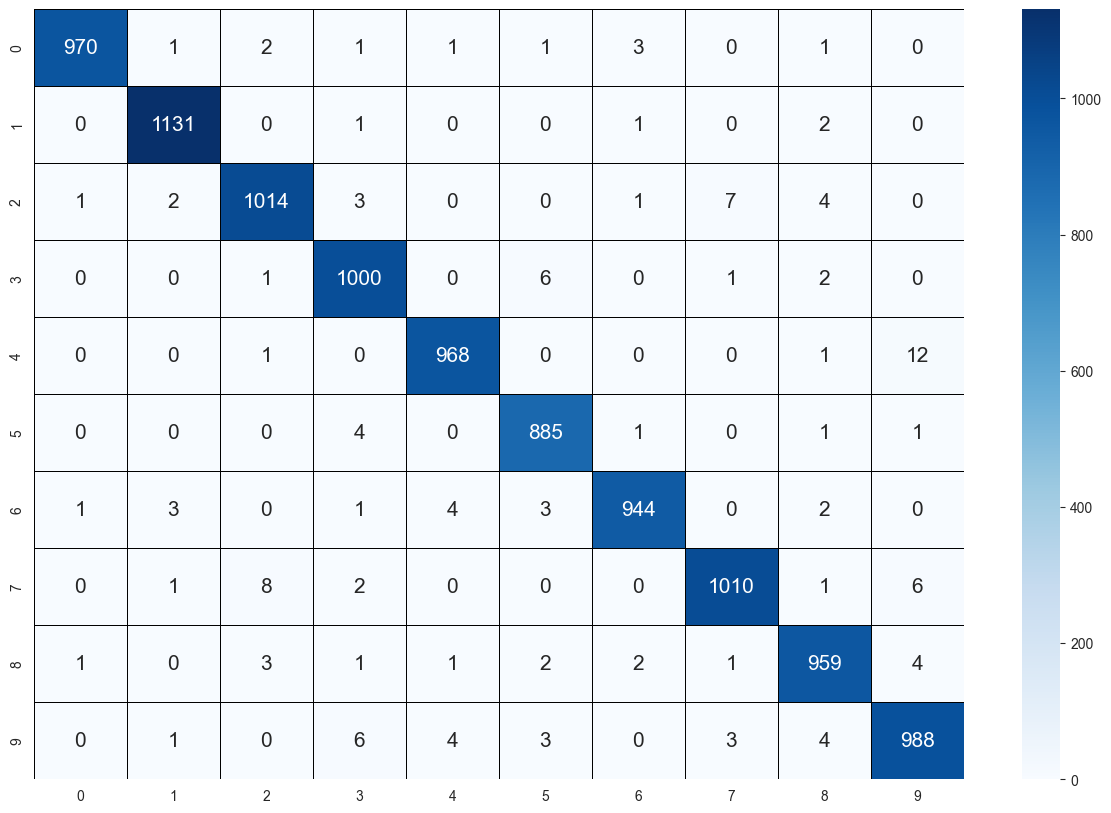

In [62]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [63]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False], shape=(10000,))

In [64]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

np.int64(131)

In [65]:
np.equal(y_test, y_pred).sum()

np.int64(9869)

# Prediction

In [66]:
my_number = X_test[3]

In [67]:
my_number.shape

(28, 28, 1)

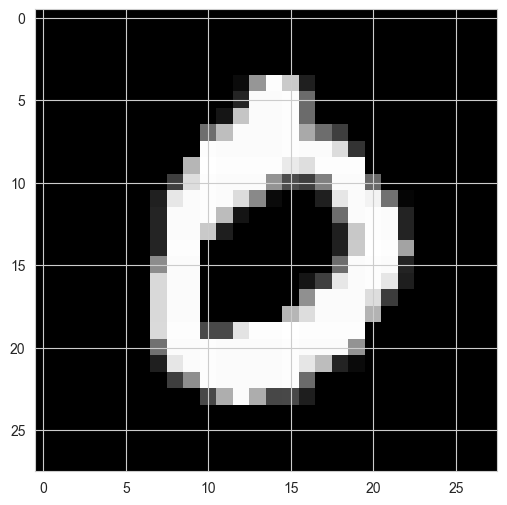

In [68]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [69]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [70]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.9999988 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00000122, 0.        , 0.        , 0.        ]],
      dtype=float32)

In [71]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob)
y_pred

np.int64(0)

In [72]:
model.save("cnn-1.keras")

# Using the saved model

In [73]:
model = tf.keras.models.load_model("cnn-1.keras")

In [74]:
pred = model.predict(np.expand_dims(X_test[24], 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [75]:
np.argmax(pred)

np.int64(4)

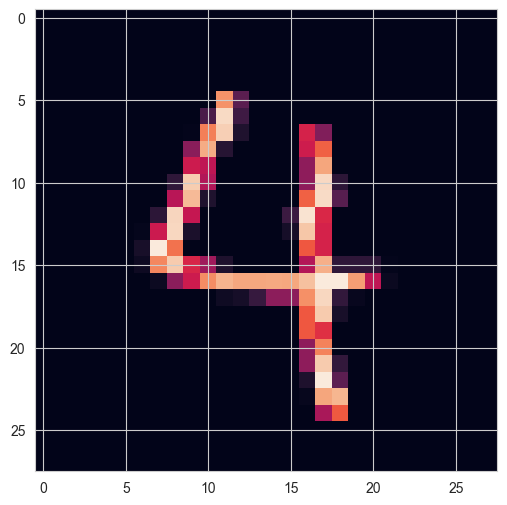

In [76]:
plt.imshow(X_test[24].reshape(28, 28))
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___